# 유방암 환자 데이터셋을 활용한 지도학습 학습모델 평가

In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

###학습모델 평가 방법(Evaluation)
- Accuracy(정확도)
- Confusion Matrix(오차행렬)
- Precision(정밀도)
- Recall(재현율)
- F1 score
- ROC/AUC

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


유방암 환자 데이터셋 로드
sklearn의 내장 dataset 활용 : load_breast_cancer
target :

- 1 양성종양 : 착한 종양(Positive)
- 0 악성종양 : 나쁜 종양(Negative)

In [3]:
cancer = load_breast_cancer()

In [4]:
print(cancer)
cancer.keys()
cancer.feature_names
cancer.target
cancer.target_names
print(cancer['DESCR'])

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
# feature(X), target(y), feature_names 분리
data = cancer['data']
target = cancer['target']
feature_names=cancer['feature_names']

데이터프레임으로 생성

In [6]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [7]:
df.head()
df["target"].value_counts()
df.loc[df['target']==1].shape # 양성종양-착한종양
df.loc[df['target']==0].shape # 악성종양-나쁜종양

(212, 31)

### input 데이터 준비

In [8]:
X = df.drop('target', axis=1)   # features
y = df['target']                # target, label

### train, test 데이터 분할

In [9]:
# test_size = 0.25,  shuffle=True(default)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, stratify=y)

### 모델 생성 및 학습

In [10]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(max_depth=5)
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [11]:
y_pred = model_dtc.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

### 성능 평가

In [12]:
print("모델의 정확도 : %.2f" % (y_pred == y_test).mean())

모델의 정확도 : 0.94


- sklearn.metrics.accuracy_score(y_true, y_pred)
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score

In [13]:
from sklearn.metrics import accuracy_score
print("모델의 정확도 : %.2f" % accuracy_score(y_test, y_pred))
#print("모델의 정확도 : %.2f" % accuracy_score(y_pred, y_test)

모델의 정확도 : 0.94


In [14]:
# 테스트 데이터(X_test)와 labels(y_test)로 모델의 정확도를 계산
print("모델의 정확도 : %.2f" % model_dtc.score(X_test, y_test))

모델의 정확도 : 0.94


#### 성능평가 함수 설명
- from sklearn.metrics import classification_report
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report

In [15]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cancer.target_names))
# classification_report(y_test, y_pred) 순으로 해야함.
# 값이 바뀜.
# print(classification_report(y_pred, y_test, target_names=cancer.target_names)) 

              precision    recall  f1-score   support

   malignant       0.89      0.96      0.93        53
      benign       0.98      0.93      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [16]:
#print(classification_report(y_test, y_pred, labels=[0, 1]))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.98      0.93      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



macro avg, weighted avg라는 값이 출력이 된다. 각각 아래와같은 의미를 가진다

- macro avg: 각 클래스에 대한 f1-score(precision, recall)를 계산한 뒤 단순한 산술 평균을 내어 값을 계산함.
- weighted avg:
    - 불균형한 데이터일 경우에 보는 수치값.
    - 각 class에 해당하는 data의 개수에 가중치를 주어 평균을 구한 것
    - ex) (0.8943 + 0.9890) / 143 = 0.95

출처: https://jaeyung1001.tistory.com/252
출처: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report

### ROC/AUC 곡선 구하기
RoC/Auc score가 1에 가까울 수록 좋은 모델임

In [17]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

np.float64(0.9477987421383648)

# 양성 환자 편향 데이터로 구성

극단적으로 데이터 표현, 다음과 같이 data 생성
양성 환자 357개 + 악성 환자 5개

In [18]:
df_pos = df.loc[df['target']==1] # 양성종양 -착한종양
df_neg = df.loc[df['target']==0] # 악성종양 -나쁜 종양
df_pos.head(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [19]:
df_neg[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
#악성 종양 5개 샘프링, 양성 종양에 편향된 데이터 준비
df_sample = pd.concat([df_pos, df_neg[:5]], sort=True)

In [23]:
X = df_sample.drop('target', axis=1)
y = df_sample['target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, shuffle=True, stratify=y)

### 모델 생성 및 모델 학습


In [27]:
from sklearn.tree import DecisionTreeClassifier
model_dtc2 = DecisionTreeClassifier(max_depth=5)
model_dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [28]:
y_pred = model_dtc2.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [29]:
pred_y = model_dtc2.predict(X_test)
# print(classification_report(y_test, y_pred, target_names=cancer.target_names))
print(classification_report(y_test, y_pred, target_names=cancer.target_names, zero_division=True))

              precision    recall  f1-score   support

   malignant       1.00      0.00      0.00         1
      benign       0.99      1.00      0.99        90

    accuracy                           0.99        91
   macro avg       0.99      0.50      0.50        91
weighted avg       0.99      0.99      0.98        91



의사가 모든 암환자 진단을 양성으로 판단한다고 가정하면,
의사가 모두 양성종양으로 진단한것과 ML 예측을 비교했을 때,
예측률은 높으나 유능한 의사라 보기 어려움

### 정확도의 모순
 - 정확도(Accuracy) : 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 자료
 - 정확도(Accuracy) = (예측 결과와 실제 데이터가 동일한 건수) / (전체 예측 데이터 건수)
정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 위와 같은 오류에 빠질 수 있음.

이를 보완하기 위해 나온 지표들을 살펴보자.
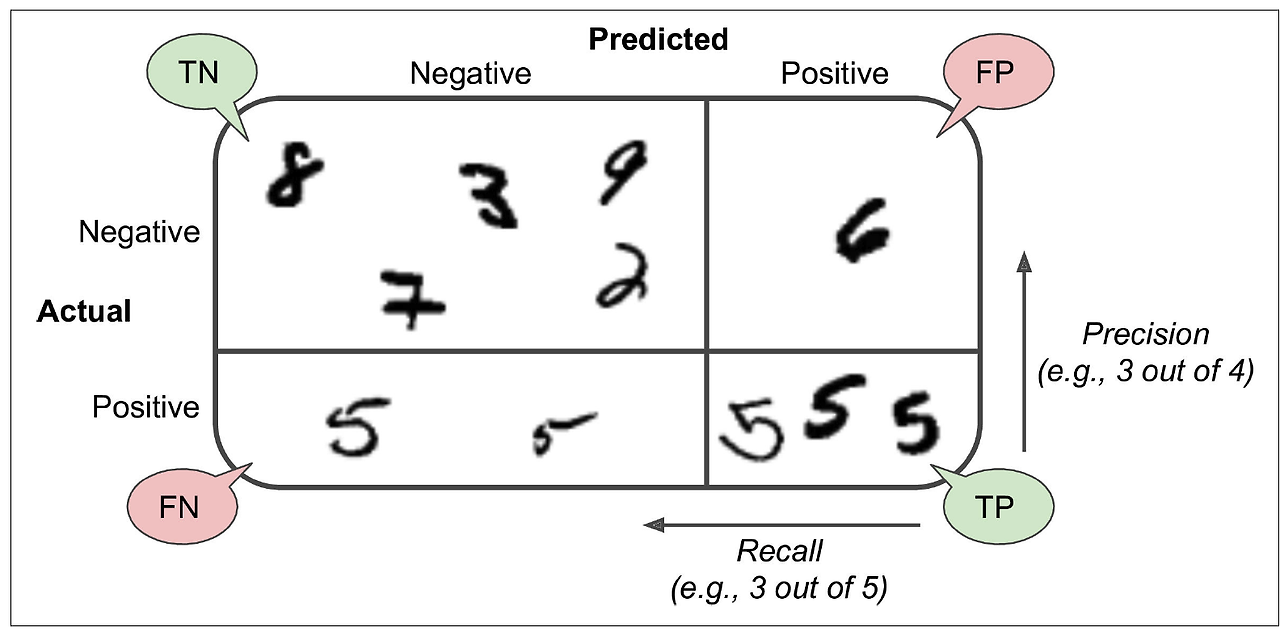
#### confusion maxtix(오차 행렬, 혼동 행렬)
이진 분류의 예측 오류가 얼마인지와 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 자료

숫자 5인지, 아닌지를 맞추는 모델


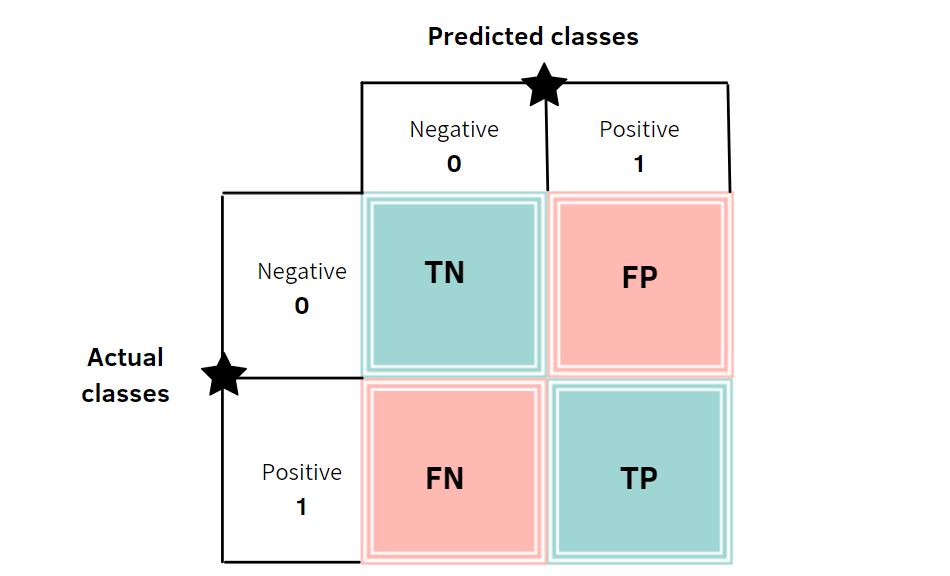

정확도(Accuracy) : 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 자료

정확도(Accuracy) = (TN+TP) / (TN+FP+FN+TP)

In [30]:
# confusion_matrix 결과 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # (target값, 예측결과값)

array([[ 0,  1],
       [ 0, 90]])

FP :악성 암인데 양성 암이 아니라고 판단할 수 있음


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


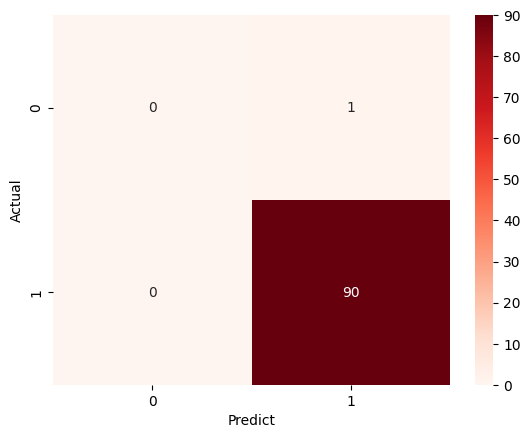

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')

plt.show()

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

## 정밀도, 재현율, f1-score
### 정밀도 (precision)
예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율.
Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측 정확도 라고 함.
정밀도 = TP / (TP + FP)

In [34]:
#정밀도 구하기
precision_score(y_test, y_pred)

np.float64(0.989010989010989)

In [35]:
# 맞춘 갯수 / (맞춘 갯수 + 틀린 갯수)
90/91

0.989010989010989

무조건 양성으로 판단하면 좋은 정밀도를 얻기 때문에 유용하지 않음.

#### 재현율 (recall)

실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
정확하게 감지한 양성 샘플의 비율

민감도 (sensitivity) 혹은 TPR(True Positive Rate) 이라고도 함.
재현율 = TP / (TP + FN)

In [36]:
# 재현율 구하기
recall_score(y_test, y_pred)

np.float64(1.0)

In [37]:
##TP/(TP+FN) : 양성암을 양성 암아리고 한것/(실제 양성암인데 아니라고 한것 + 양성암을 양성 암아리고 한것)
90/90

1.0